In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [2]:
time_format = '%Y-%m-%d'

In [37]:
stock = pd.read_csv('S&P500_Daily_Stock_Data.csv')
stock = stock.drop('Unnamed: 0', axis = 1)
stock['HLOC'] = stock.iloc[:,[1,2,3,4]].mean(axis=1)
stock['Date'] = pd.to_datetime(stock['Date'])
stock = stock[stock['Date'] > '2009-01-01']
stock = stock.drop(['Open', 'High', 'Low', 'Close', 'Opening % Change', 'Closing % Change', 'High % Change', 
                   'Low % Change', 'Open Moving Average', 'Open Moving Average', 'Close Moving Average', 'High Moving Average',
                   'Low Moving Average'], axis = 1)
stock['Date'] = pd.to_datetime(stock['Date'])
SP_500 = pd.read_csv('S&P500 Companies.csv')
stock = pd.merge(stock,SP_500[['Symbol', 'GICS Sector']] , left_on = 'Name', right_on = 'Symbol').drop('Symbol', axis = 1)
stock = stock.set_index('Date')
stock.interpolate(method = 'time', inplace= True)

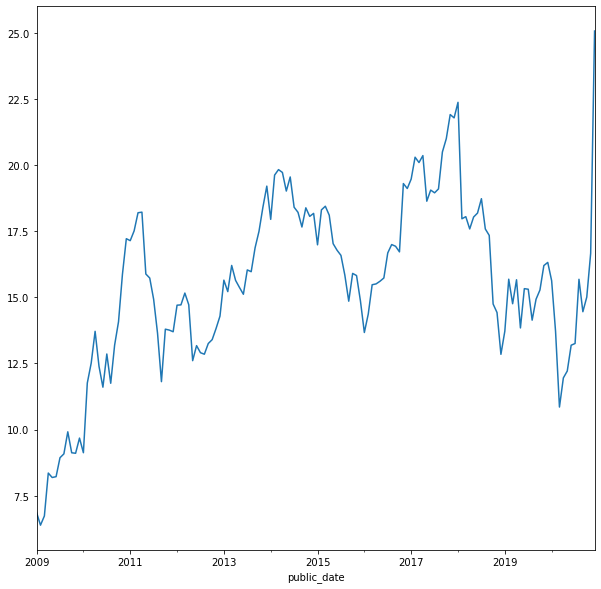

In [97]:
industry = pd.read_csv('Financial_Ratios_Industry.csv')
industry['public_date'] = [datetime.datetime.strptime(str(x), '%Y%m%d').strftime('%Y-%m-%d') for x in industry['public_date']]
industry['public_date'] = pd.to_datetime(industry['public_date'],errors='coerce')
industry['divyield_Median'] = industry['divyield_Median'].str.replace('%', '')
industry['divyield_Median']= industry['divyield_Median'].astype('float64')
industry = industry[industry['public_date']>'2009-01-01']
industry = industry.set_index('public_date')
industry[industry['gicdesc'] == 'Industrials']['pe_inc_Median'].plot(figsize = (10,10))
plt.show()

In [55]:
company_ratio = pd.read_csv('Financial_Ratios_S&P.csv')
company_ratio['public_date'] = [datetime.datetime.strptime(str(x), '%Y%m%d').strftime('%Y-%m-%d') 
                                for x in company_ratio['public_date']]
company_ratio['public_date'] = pd.to_datetime(company_ratio['public_date'],errors='coerce')
company_ratio = company_ratio[company_ratio['public_date']>'2009-01-01']
company_ratio = pd.merge(company_ratio, SP_500[['Symbol', 'GICS Sector']], left_on = 'TICKER',
                         right_on = 'Symbol').drop(['Symbol'], axis = 1)
company_ratio = company_ratio.set_index('public_date')
company_ratio.interpolate(method = 'time', inplace = True)

In [56]:
company_ratio

,permno,adate,qdate,CAPEI,bm,evm,pe_op_basic,pe_op_dil,pe_exi,pe_inc,...,sale_nwc,rd_sale,adv_sale,staff_sale,accrual,ptb,PEG_trailing,divyield,TICKER,GICS Sector
public_date,,,,,,,,,,,,,,,,,,,,,
2009-01-31,10104,20080531.0,20081130,22.424,0.294,10.923,14.763,15.027,15.162,15.162,...,2.873,0.119,0.004,0.0,0.055,3.556,0.573,NaN,ORCL,Information Technology
2009-02-28,10104,20080531.0,20081130,20.446,0.294,10.923,13.632,13.875,14.000,14.000,...,2.873,0.119,0.004,0.0,0.055,3.242,0.529,NaN,ORCL,Information Technology
2009-03-31,10104,20080531.0,20081130,23.777,0.294,10.923,15.851,16.134,16.279,16.279,...,2.873,0.119,0.004,0.0,0.055,3.770,0.615,NaN,ORCL,Information Technology
2009-04-30,10104,20080531.0,20090228,24.420,0.310,10.282,16.817,16.965,17.423,17.423,...,3.001,0.118,0.004,0.0,0.063,4.013,0.758,1.03%,ORCL,Information Technology
2009-05-31,10104,20080531.0,20090228,24.842,0.310,10.282,17.035,17.184,17.649,17.649,...,3.001,0.118,0.004,0.0,0.063,4.082,0.768,1.02%,ORCL,Information Technology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-31,93436,20191231.0,20200630,-441.460,0.049,35.254,251.677,265.064,258.197,258.197,...,16.310,0.054,0.001,0.0,0.067,47.117,46.705,NaN,TSLA,Consumer Discretionary
2020-09-30,93436,20191231.0,20200630,-386.670,0.049,35.254,216.672,228.197,222.285,222.285,...,16.310,0.054,0.001,0.0,0.067,41.269,40.209,NaN,TSLA,Consumer Discretionary
2020-10-31,93436,20191231.0,20200630,-349.700,0.049,35.254,195.980,206.404,201.057,201.057,...,16.310,0.054,0.001,0.0,0.067,37.324,36.369,NaN,TSLA,Consumer Discretionary


<AxesSubplot:xlabel='Date'>

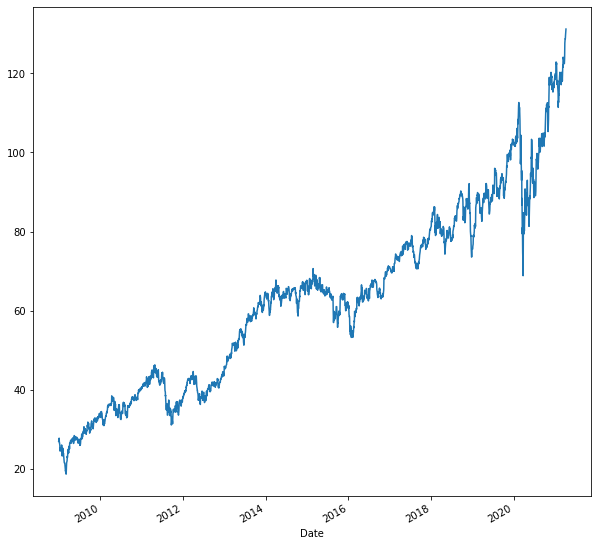

In [5]:
stock[stock['GICS Sector'] =='Industrials'].groupby('Date').median()['HLOC'].plot(figsize = (10,10))

Communication Services -0.564274483988611
Consumer Discretionary 0.11112330044817668
Consumer Staples 0.6191608418067746
Energy 0.36436601679163916
Financials 0.5376421424010942
Health Care -0.1372234798274322
Industrials 0.5120632335964731
Information Technology -0.2636810621784131
Materials 0.5327583361089927
Utilities 0.9055556312984238
Real Estate -0.2990180473482192


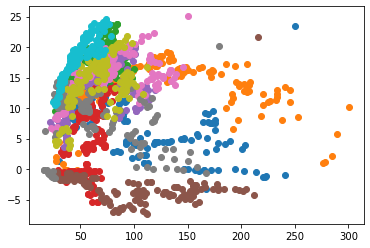

In [6]:
sectors = industry['gicdesc'].unique()
for val in sectors:
    industry_by_month = industry.loc[lambda industry: industry['gicdesc'] == val, :]
    stock_industry = stock.loc[lambda stock: stock['GICS Sector'] == val, :]
    stock_by_month = stock_industry.groupby(pd.Grouper(freq="M")).mean()
    stock_by_month = stock_by_month[stock_by_month.index < datetime.datetime(2021,1,1)]
    print(val, stock_by_month['HLOC'].corr(industry_by_month['pe_inc_Median']))
    try:
        plt.scatter(stock_by_month['HLOC'], industry_by_month['pe_inc_Median'])
    except:
        pass

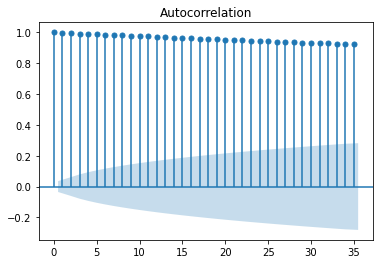

In [31]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(stock[stock['GICS Sector'] =='Materials'].groupby('Date').median()['HLOC'])
plt.show()

In [30]:
stock[stock['GICS Sector'] =='Health Care'].isna().sum()

Adj Close       0
Volume          0
Name            0
HLOC % Final    0
HLOC            0
GICS Sector     0
dtype: int64

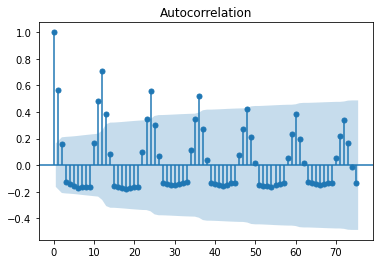

In [76]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(company_ratio[company_ratio['TICKER'] == 'AAPL']['pe_inc'], lags = 75)
plt.show()

In [100]:
val = 'Industrials'
ratio_list = list(industry.columns)
ratio_list.remove('gicdesc')
ratio_list.remove('NFIRM')
correlation_dictionary = {}
for ratio in ratio_list:
    industry_by_month = industry.loc[lambda industry: industry['gicdesc'] == val, :]
    stock_industry = stock.loc[lambda stock: stock['GICS Sector'] == val, :]
    stock_by_month = stock_industry.groupby(pd.Grouper(freq="M")).mean()
    stock_by_month = stock_by_month[stock_by_month.index < datetime.datetime(2021,1,1)]
    correlation_dictionary[ratio] =  stock_by_month['HLOC'].corr(industry_by_month[ratio])

In [109]:
correlation_df = pd.Series(correlation_dictionary, name = 'correlation')
correlation_df = pd.DataFrame(correlation_df)
correlation_df.sort_values(by = 'correlation', key=pd.Series.abs, ascending = False)

,correlation
lt_debt_Median,0.948109
de_ratio_Median,0.940359
capital_ratio_Median,0.940353
debt_invcap_Median,0.939090
equity_invcap_Median,-0.938948
...,...
intcov_Median,0.003969
indret_ew,-0.003586
rd_sale_Median,NaN
adv_sale_Median,NaN


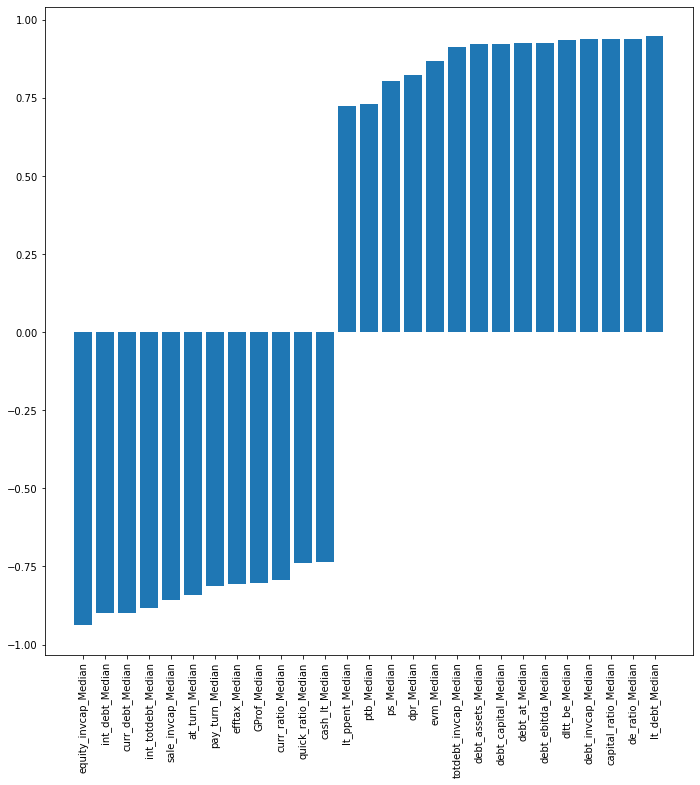

In [132]:
bar = correlation_df[correlation_df['correlation'].abs()>0.7].sort_values(by = 'correlation')
fig = plt.figure(figsize = (9,9))
ax = fig.add_axes([0,0,1,1])
langs = bar.index
ax.bar(langs,bar['correlation'])
plt.xticks(rotation = 90)
plt.show()


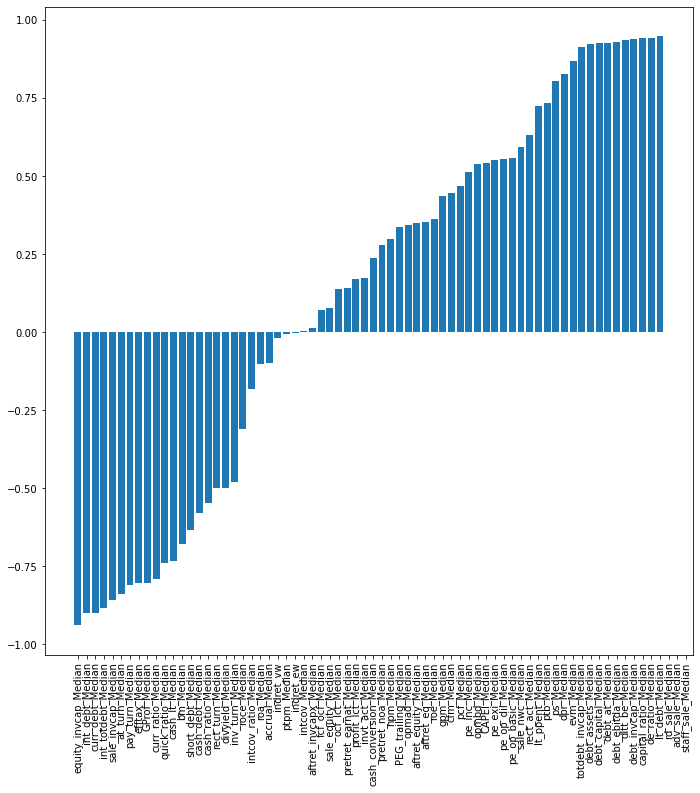

In [133]:
bar = correlation_df.sort_values(by = 'correlation')
fig = plt.figure(figsize = (9,9))
ax = fig.add_axes([0,0,1,1])
langs = bar.index
ax.bar(langs,bar['correlation'])
plt.xticks(rotation = 90)
plt.show()